In [1]:
%cd ../

In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.tardb as tardb

from ordered_set import OrderedSet
import matplotlib.pyplot as plt
import itertools
import torch


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')
PREFIX = 'avfp_memory_111'

In [6]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

In [7]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [9]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'
    
def subject_labeler(subject):
    return 'Subject %d' % subject

In [10]:
dtfa.load_state('data/sub-1CHECK_10202021_181141') #saved model name here.

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


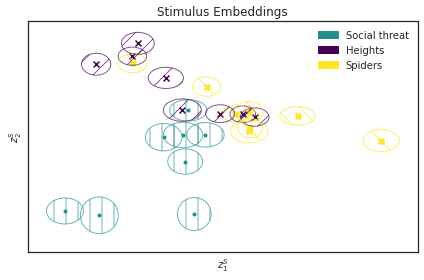

In [11]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100)

[[2103994624.0, -2103975168.0, 19276.3984375],
 [2149458432.0, -2067477760.0, 19567.037109375]]

In [14]:
dtfa.load_state('data/sub-1CHECK_10252021_200322')

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


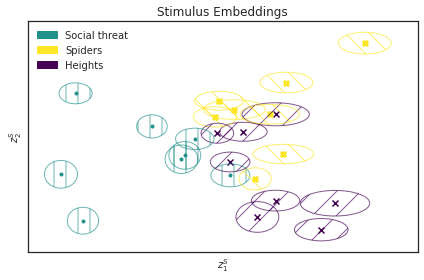

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [17]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100)

[[2104607744.0, -2104588544.0, 19279.75390625],
 [2140433664.0, -2068385152.0, 19534.109375]]